<a href="https://colab.research.google.com/github/RobertTalbert/linalg-diffeq/blob/main/tutorials/Creating_a_slope_field_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a slope field in Python

This tutorial will walk you through the steps for creating a *slope field*, also sometimes called a *direction field*, for a differential equation in Python. **Unfortunately, this is not as simple as some of the other things we've done in Python and it does not use SymPy.** SymPy can solve a differential equation symbolically (we'll learn how, later) but it lacks the functionality for plotting slope fields. So this process goes further afield (ha ha!) than our usual work. 

The basic workflow for making a slope field for a differential equation goes like this: 

1. Load the tools
2. Specify a grid in the $xy$-plane for plotting the arrows 
3. Enter in the differential equation 
4. Optional but recommended: Make the arrows all length 1
5. Plot the arrows on the grid you specified, using the DE to determine the slope and direction. 

## Load the tools 

Making a direction field is not a symbolic computation but a numerical one. So instead of using SymPy, we use another package called **NumPy** (pronounced NOOM-pie) which is a suite of tools for doing numerical analysis in Python. We are also going to import a piece of another library called **Matplotlib** that is a standard library for plotting things.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

The `as np` part of this is giving NumPy the alias `np` so that we can type `np` instead of `numpy` from here on. Similarly we can type `plt` instead of `matplotlib.pyplot`. 

## Specify a grid 

A slope field is a bunch of arrows plotted on top of a rectangular grid. The next step is to specify the grid. The following commands will create a grid in the $ty$-plane that goes from $-3$ to $3$ on the $t$-axis and $-1$ to $1$ on the $y$-axis, with grid points every $0.25$ units in each direction: 

In [2]:
nt, ny = 0.25, 0.25
t = np.arange(-3,3,nt)
y = np.arange(-1,1,ny)
T,Y = np.meshgrid(t,y)

The first line specifies the distance between each grid point -- basically it tells Python how many arrows to plot. The smaller the number, the more arrows are plotted. 

The second two lines call the `arange` function from NumPy. Line 2 creates an array of numbers from $-3$ to $3$ that are $0.25$ units apart: 


In [3]:
t

array([-3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  ,
       -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
        1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75])

A similar thing happens in line 3. And line 4 puts these two arrays together, to create a "mesh grid" that is a $24 \times 8$ subdivision of the rectangle $[-3,3] \times [-1,1]$ in the $ty$-plane. Here's what it looks like so far: 

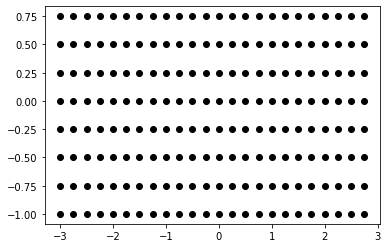

In [4]:
plt.plot(T,Y,marker = 'o', color = "k", linestyle="none")
plt.show()

## Enter the differential equation

Let's look at the first-order differential equation $\frac{dy}{dt} = y - t$. **Once the derivative is isolated on the left side** (this *must* be done first) then enter in the DE using `Y` and `T`: 

In [5]:
dYdT = Y - T

Note: We need to use the *capital* `Y` and `T` here because those are the dimensions of the meshgrid where the arrows will go. Using lower-case `y` and `t` here, although those are defined, will not give us the right result. 

## Normalize the arrows

We could jump to plotting the arrows here, but NumPy will plot them with different lengths. To make the slope field easier to read, we'll adjust the length of the arrows so they are all the same: 

In [6]:
U = 1/(1 + dYdT**2)**0.5 * np.ones(T.shape)
V = 1/(1 + dYdT**2)**0.5 * dYdT

You don't really need to understand the details here; just that the result will produce vectors with identical lengths for the arrows. 

## Plot everything

Now it's time to visualize the slope field. This uses a Matplotlib command `quiver` which, like a real quiver, contains a collection of arrows. The `plt.figure()` at the top creates a blank set of axes and must be done first. Then we add an optional command to give the picture a title. Finally the third line plots the arrows on top of the grid using `dYdT` to determine the direction: 

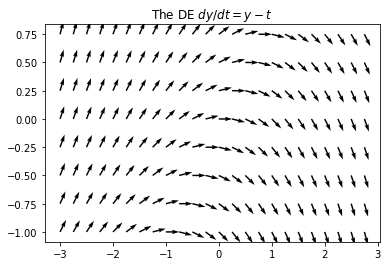

In [7]:
plt.figure()
plt.title("The DE $dy/dt = y-t$")
Q = plt.quiver(T,Y,U,V)

NumPy and Matplotlib do not put in the coordiate axes by default; you're supposed to look at the edges of the box for coordinates. But if you really want to see the axes, you can add two more commands: 

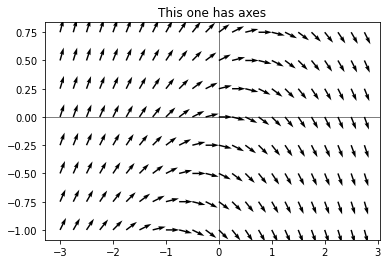

In [8]:
plt.figure()
plt.title("This one has axes")

# Add x-axis; try changing some of these values to see what happens
plt.axhline(0, color = "black", linewidth = .5)
# Add y-axis
plt.axvline(0, color = "black", linewidth = .5)
Q = plt.quiver(T,Y,U,V)

The completed code all in one place is below: 

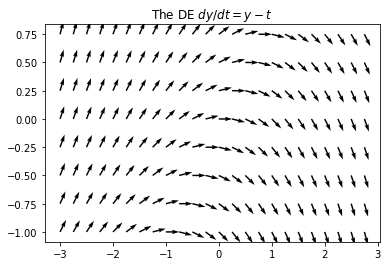

In [9]:
import numpy as np
import matplotlib.pyplot as plt

nt, ny = 0.25, 0.25
t = np.arange(-3,3,nt)
y = np.arange(-1,1,ny)
T,Y = np.meshgrid(t,y)

dYdT = Y - T

U = 1/(1 + dYdT**2)**0.5 * np.ones(T.shape)
V = 1/(1 + dYdT**2)**0.5 * dYdT

plt.figure()
plt.title("The DE $dy/dt = y-t$")
# Uncomment the next two lines for axes
# plt.axhline(0, color = "black", linewidth = .5)
# plt.axvline(0, color = "black", linewidth = .5)
Q = plt.quiver(T,Y,U,V)

## Another example

Here's the slope field for $(1+t^2)y' + 2ty = 0$. First we have to get $y'$ by itself on the left: 

$$y' = -\frac{2ty}{t^2+1}$$

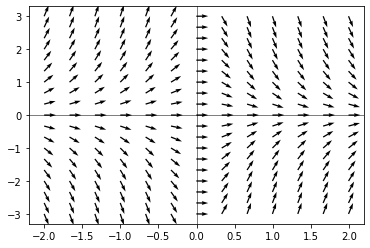

In [10]:
# No need to re-import NumPy or Matplotlib
# Once imported, they are available everywhere in your notebook. 

# Let's plot this slope field on t = -2..2 and y = -3..3 with slightly less 
# dense field of arrows. 
nt, ny = 0.333, 0.333
t = np.arange(-2,2,nt)
y = np.arange(-3,3,ny)
T,Y = np.meshgrid(t,y)

# Remember to put * for multiplication, ** for powers
dYdT = -(2*T*Y)/(T**2 + 1)

U = 1/(1 + dYdT**2)**0.5 * np.ones(T.shape)
V = 1/(1 + dYdT**2)**0.5 * dYdT

plt.figure()
# No title this time, but let's add the axes
plt.axhline(0, color = "black", linewidth = .5)
plt.axvline(0, color = "black", linewidth = .5)
Q = plt.quiver(T,Y,U,V)

## One last example

Let's do $y' = -y \cot(t)$. Here, we need to use NumPy to call the trig function. NumPy has built-in trig functions but only sine, cosine, and tangent. We can call those functions using the syntax `np.sin()`, `np.cos()`, and `np.tan()` with the specific argument plugged in. For example `np.cos(0)` will return `1`. There's no cotangent function, but that's OK because $\cot(t) = \frac{1}{\tan(t)}$: 

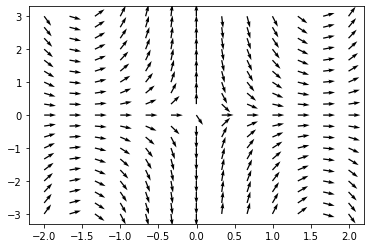

In [11]:
nt, ny = 0.333, 0.333
t = np.arange(-2,2,nt)
y = np.arange(-3,3,ny)
T,Y = np.meshgrid(t,y)

dYdT = -Y / np.tan(T)

U = 1/(1 + dYdT**2)**0.5 * np.ones(T.shape)
V = 1/(1 + dYdT**2)**0.5 * dYdT

plt.figure()
Q = plt.quiver(T,Y,U,V)